# Visualize Voices and Sounds

In [2]:
import numpy as np
import pyaudio
import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import time

In [3]:
sr = 20000
chunk_size = sr // 4

## Collect Microphone data

In [21]:
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32,channels=1,rate=sr,input=True,input_device_index=0,frames_per_buffer=chunk_size)

alldata =[]
frames = []

do_melspec = librosa.feature.melspectrogram
pwr_to_db = librosa.core.power_to_db
tf = 60
start = time.time()
while (time.time() < start + tf):
    data = stream.read(chunk_size)
    data = np.frombuffer(data, dtype=np.float32)
    alldata.append(data)
    melspec = do_melspec(y=data, sr=sr, n_mels=128, fmax=4096)
    norm_melspec = pwr_to_db(melspec, ref=np.max)
    frames.append(norm_melspec)
    print(f"{time.time() - start:.1f} ",  end = '')

signal = np.hstack(alldata)
stack = np.hstack(frames)

0.3 0.5 0.7 0.9 1.2 1.4 1.6 1.9 2.0 2.3 2.6 2.7 3.0 3.2 3.4 3.7 3.9 4.1 4.3 4.6 4.8 5.0 5.3 5.4 5.7 6.0 6.1 6.4 6.7 6.8 7.1 7.3 7.5 7.8 8.0 8.2 8.4 8.6 8.9 9.1 9.3 9.6 9.8 10.0 10.2 10.5 10.7 10.9 11.2 11.3 11.6 11.9 12.0 12.3 12.5 12.7 13.0 13.2 13.4 13.6 13.9 14.1 14.3 14.6 14.8 15.0 15.3 15.4 15.7 16.0 16.1 16.4 16.5 16.8 17.1 17.2 17.5 17.7 17.9 18.2 18.4 18.6 18.9 19.1 19.3 19.5 19.8 20.0 20.2 20.5 20.6 20.9 21.2 21.3 21.6 21.8 22.0 22.3 22.5 22.7 22.9 23.2 23.4 23.6 23.9 24.1 24.3 24.6 24.7 25.0 25.2 25.4 25.7 25.8 26.1 26.4 26.5 26.8 27.0 27.2 27.5 27.7 27.9 28.2 28.4 28.6 28.8 29.1 29.3 29.5 29.8 29.9 30.2 30.5 30.6 30.9 31.1 31.3 31.6 31.8 32.0 32.3 32.5 32.7 32.9 33.1 33.4 33.6 33.8 34.0 34.3 34.5 34.7 35.0 35.1 35.4 35.7 35.8 36.1 36.3 36.5 36.8 37.0 37.2 37.5 37.7 37.9 38.1 38.4 38.6 38.8 39.1 39.2 39.5 39.8 39.9 40.2 40.4 40.6 40.9 41.0 41.3 41.6 41.7 42.0 42.2 42.4 42.7 42.9 43.1 43.3 43.6 43.8 44.0 44.3 44.4 44.7 45.0 45.1 45.4 45.6 45.8 46.1 46.3 46.5 46.7 47.0 47.2 47.

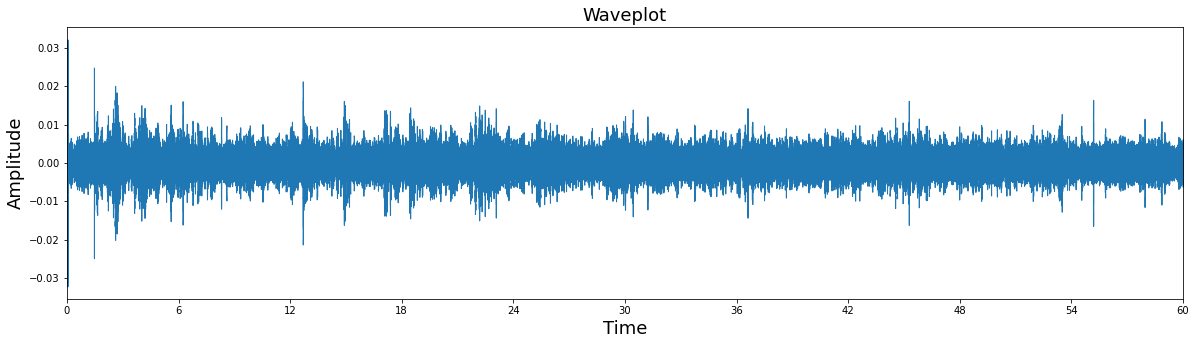

In [22]:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(signal, sr=sr)
plt.title('Waveplot', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=18))
plt.ylabel('Amplitude', fontdict=dict(size=18))
plt.xlim(0,tf)
plt.show()

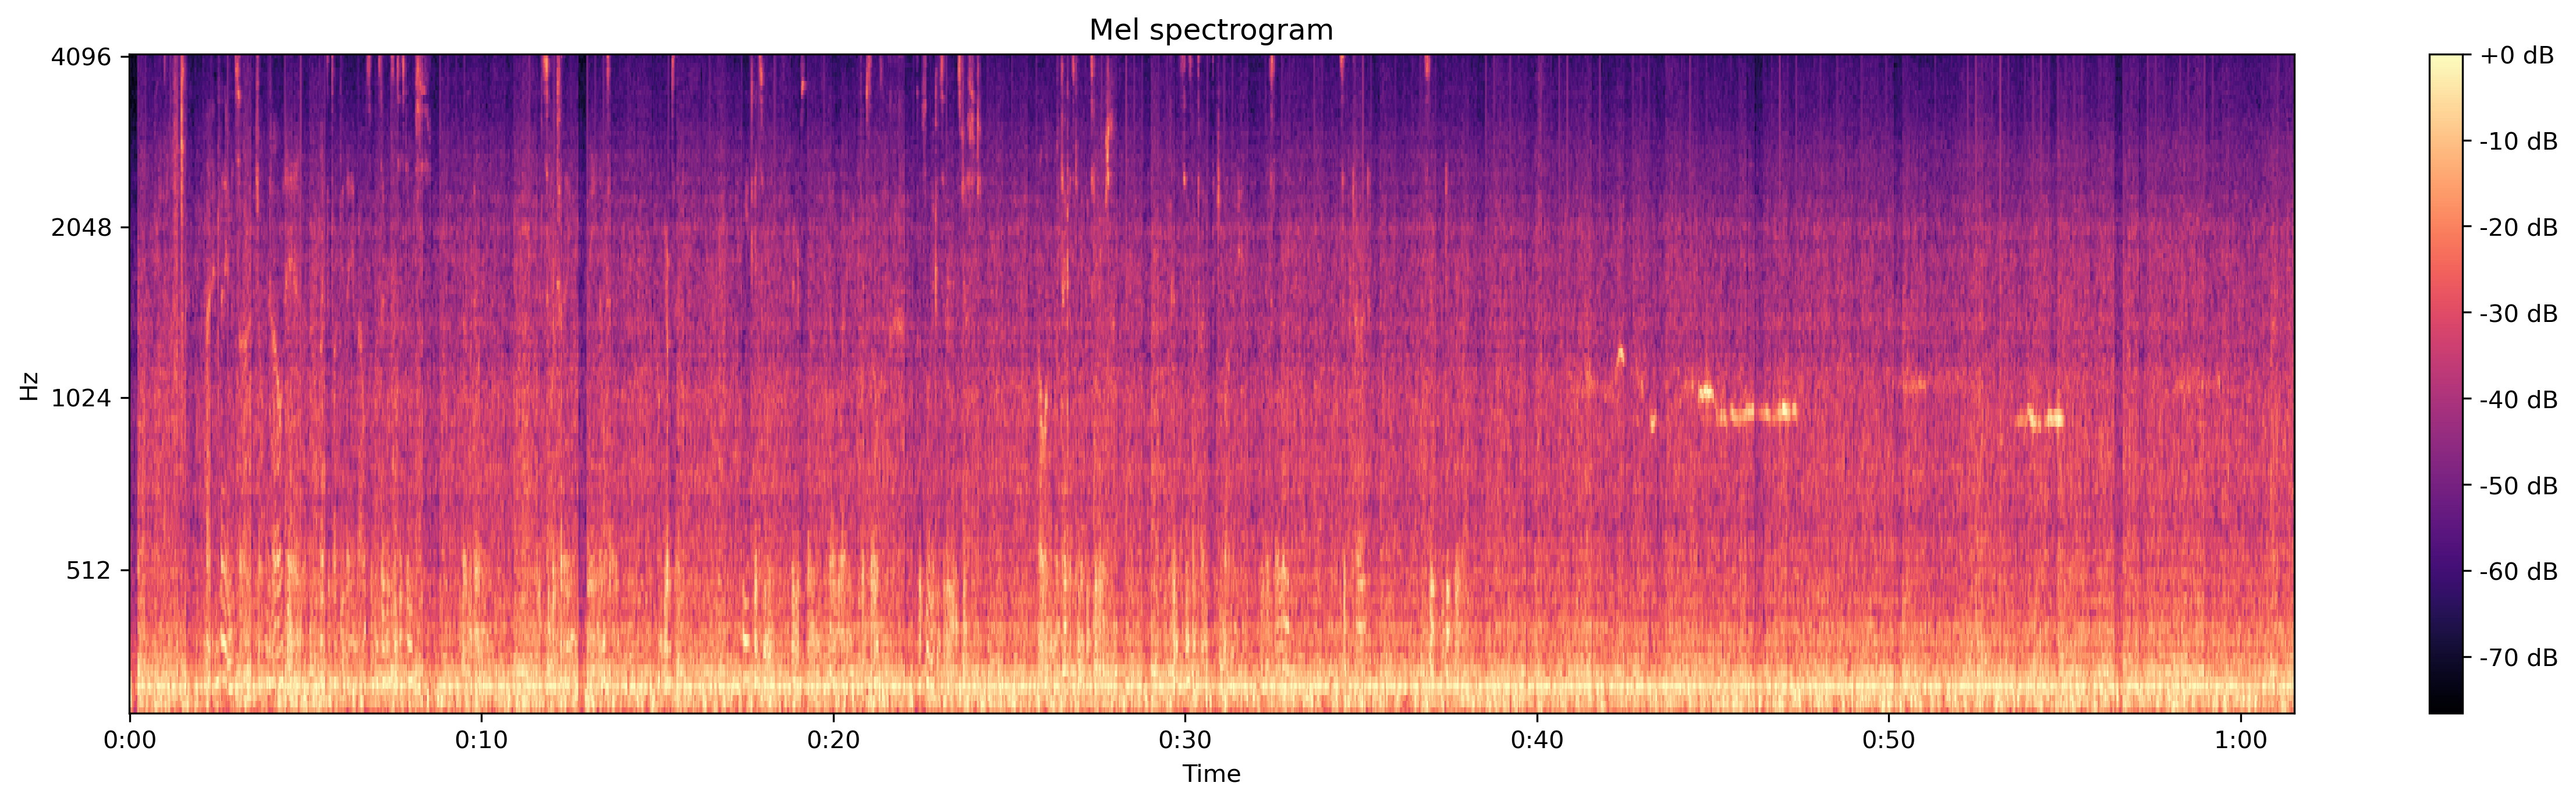

In [23]:
plt.figure(1,figsize=(20, 5),dpi=300)
librosa.display.specshow(stack, y_axis='mel', fmin = 100, fmax = 4096, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()

In [16]:
def plotdata(titledata):
    plt.figure(figsize=(20, 5),dpi=300)
    librosa.display.waveshow(signal, sr=sr)
    plt.title(titledata, fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Amplitude', fontdict=dict(size=15))
    plt.show()

    mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length, n_fft=n_fft)
    power_to_db = librosa.power_to_db(np.abs(mel_signal), ref=np.max)

    plt.figure(figsize=(20, 5),dpi=300)
    librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma', hop_length=hop_length)
    plt.colorbar(label='dB')
    plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=18))
    plt.ylabel('Frequency', fontdict=dict(size=18))
    plt.show()

    ipd.Audio(signal, rate=sr)

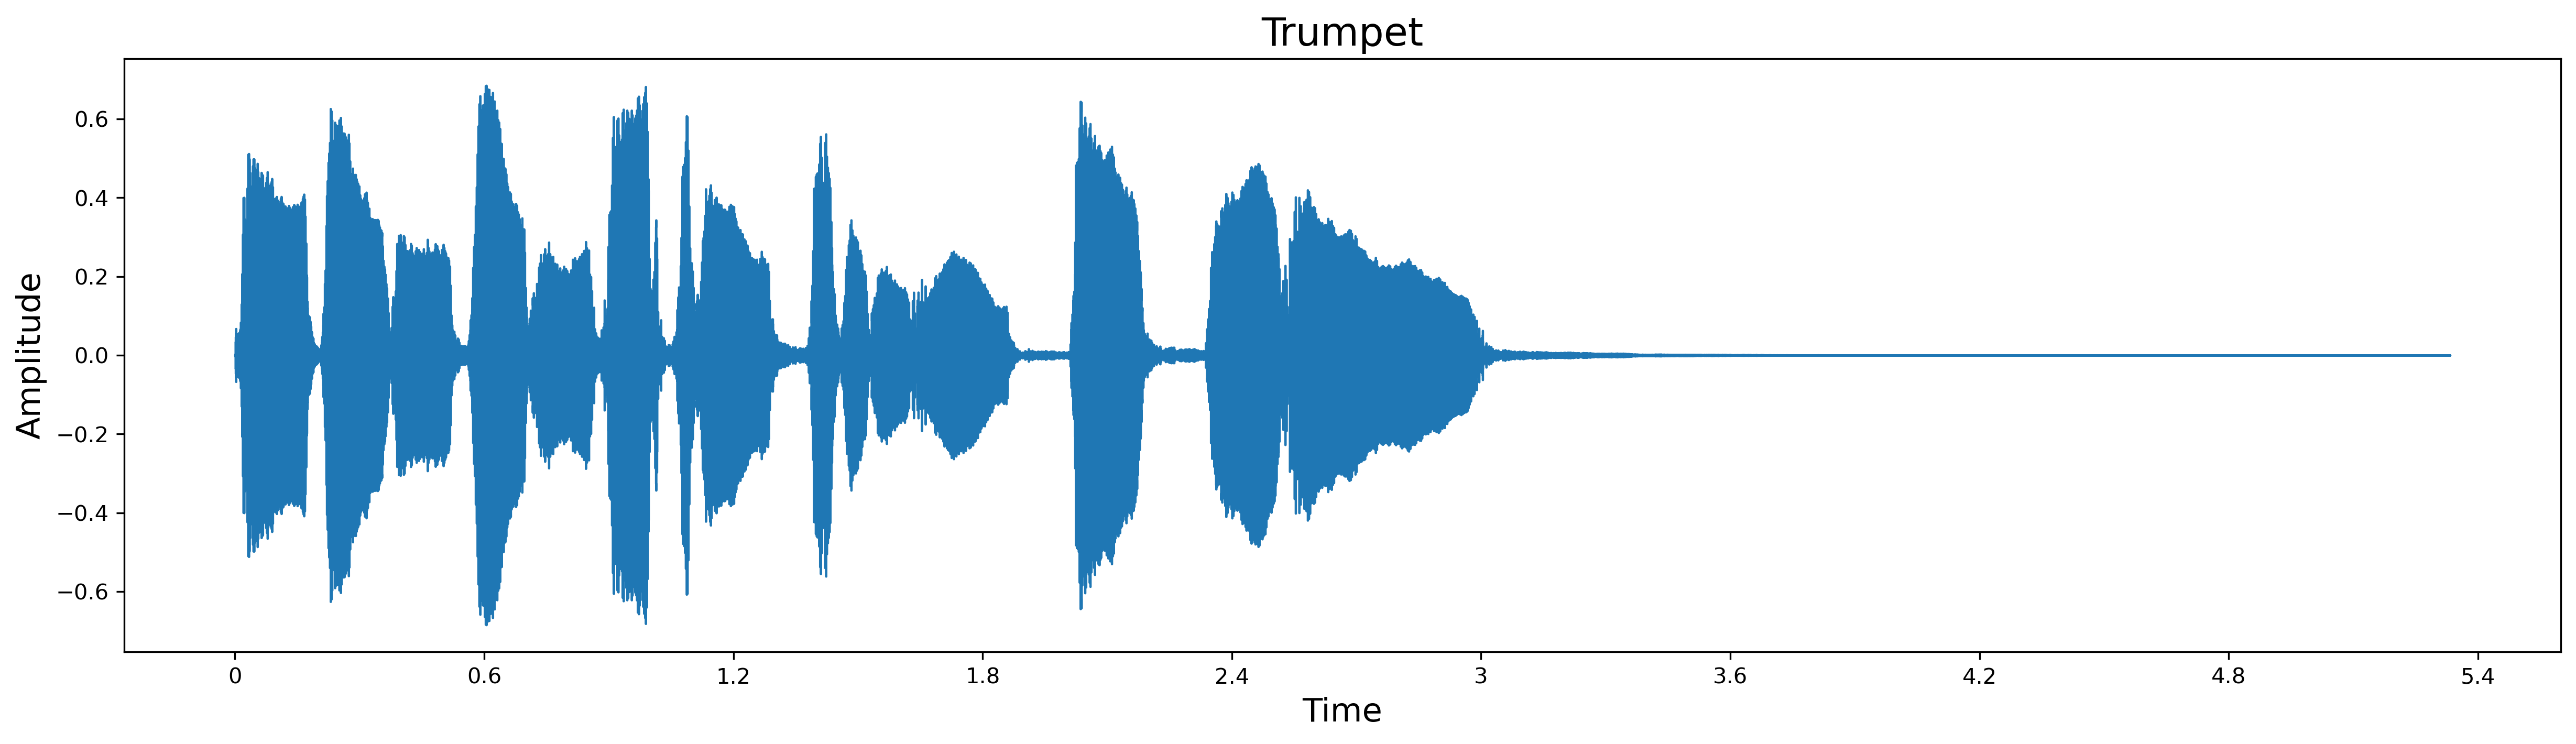

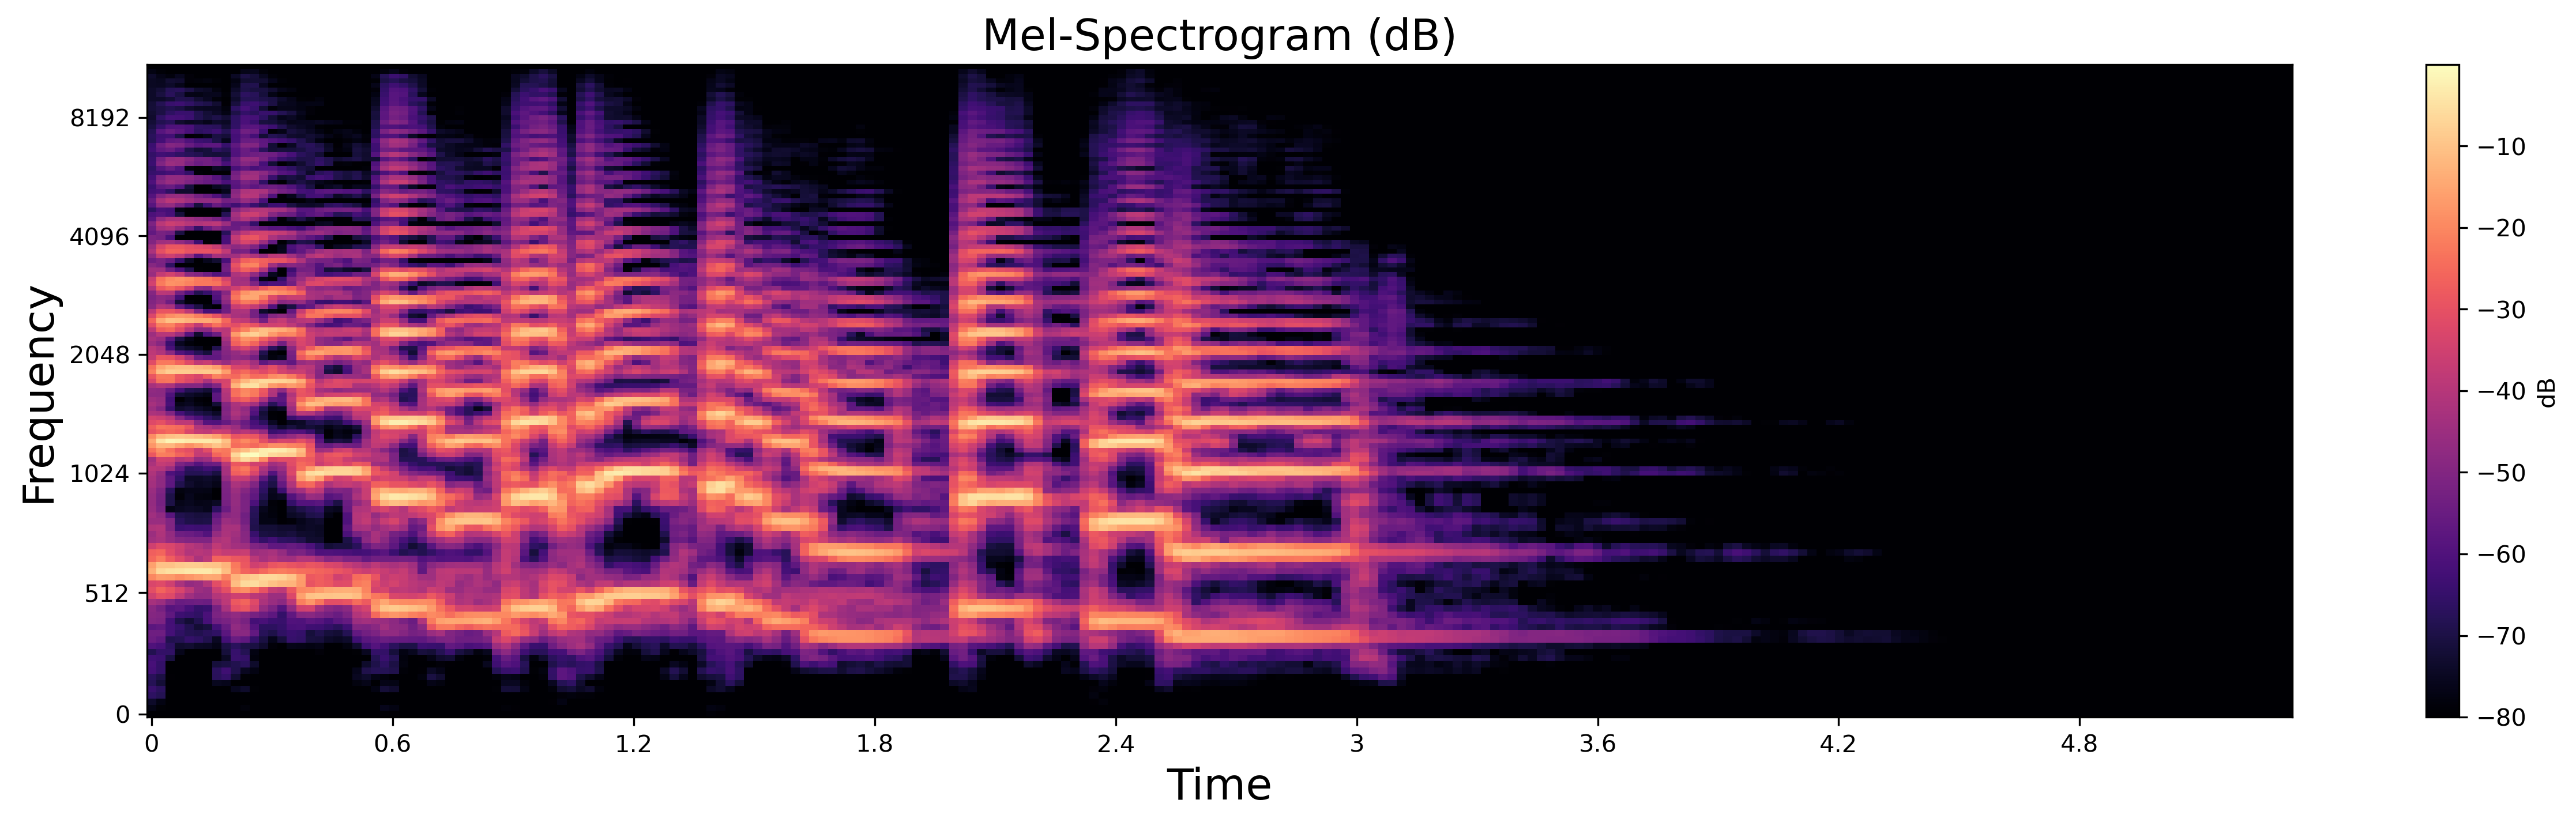

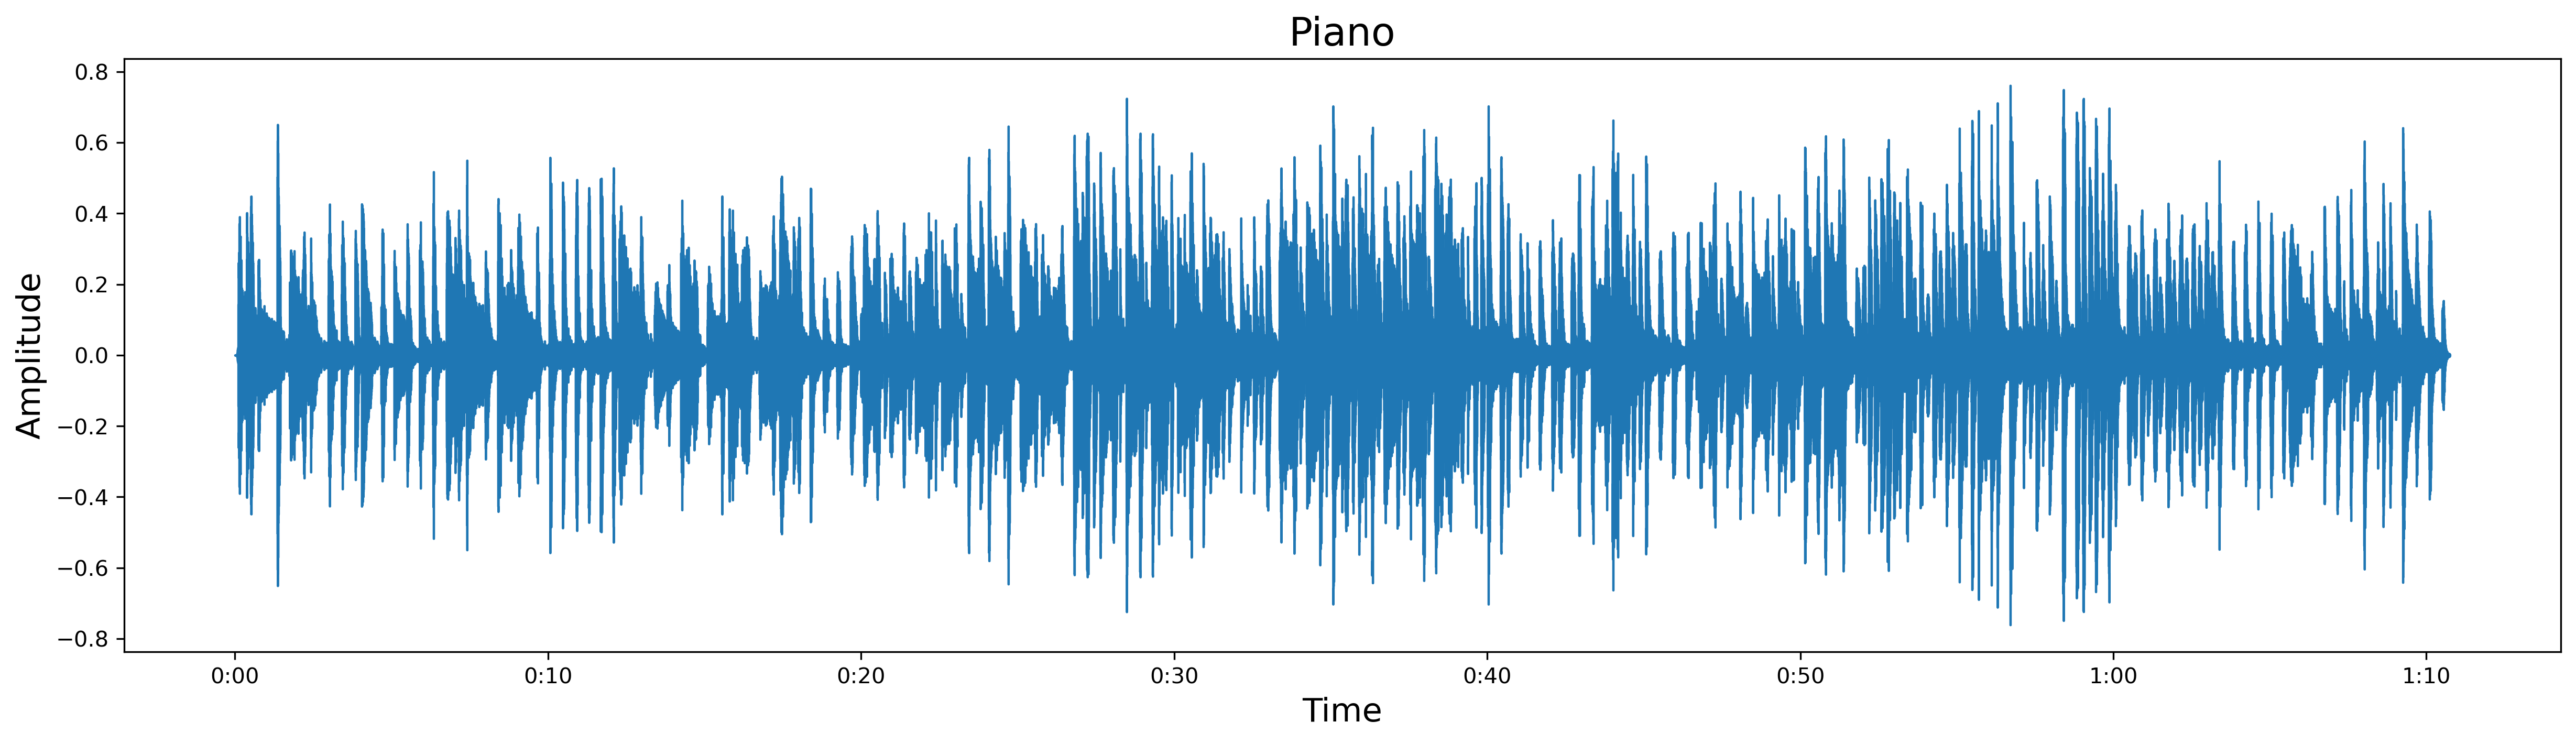

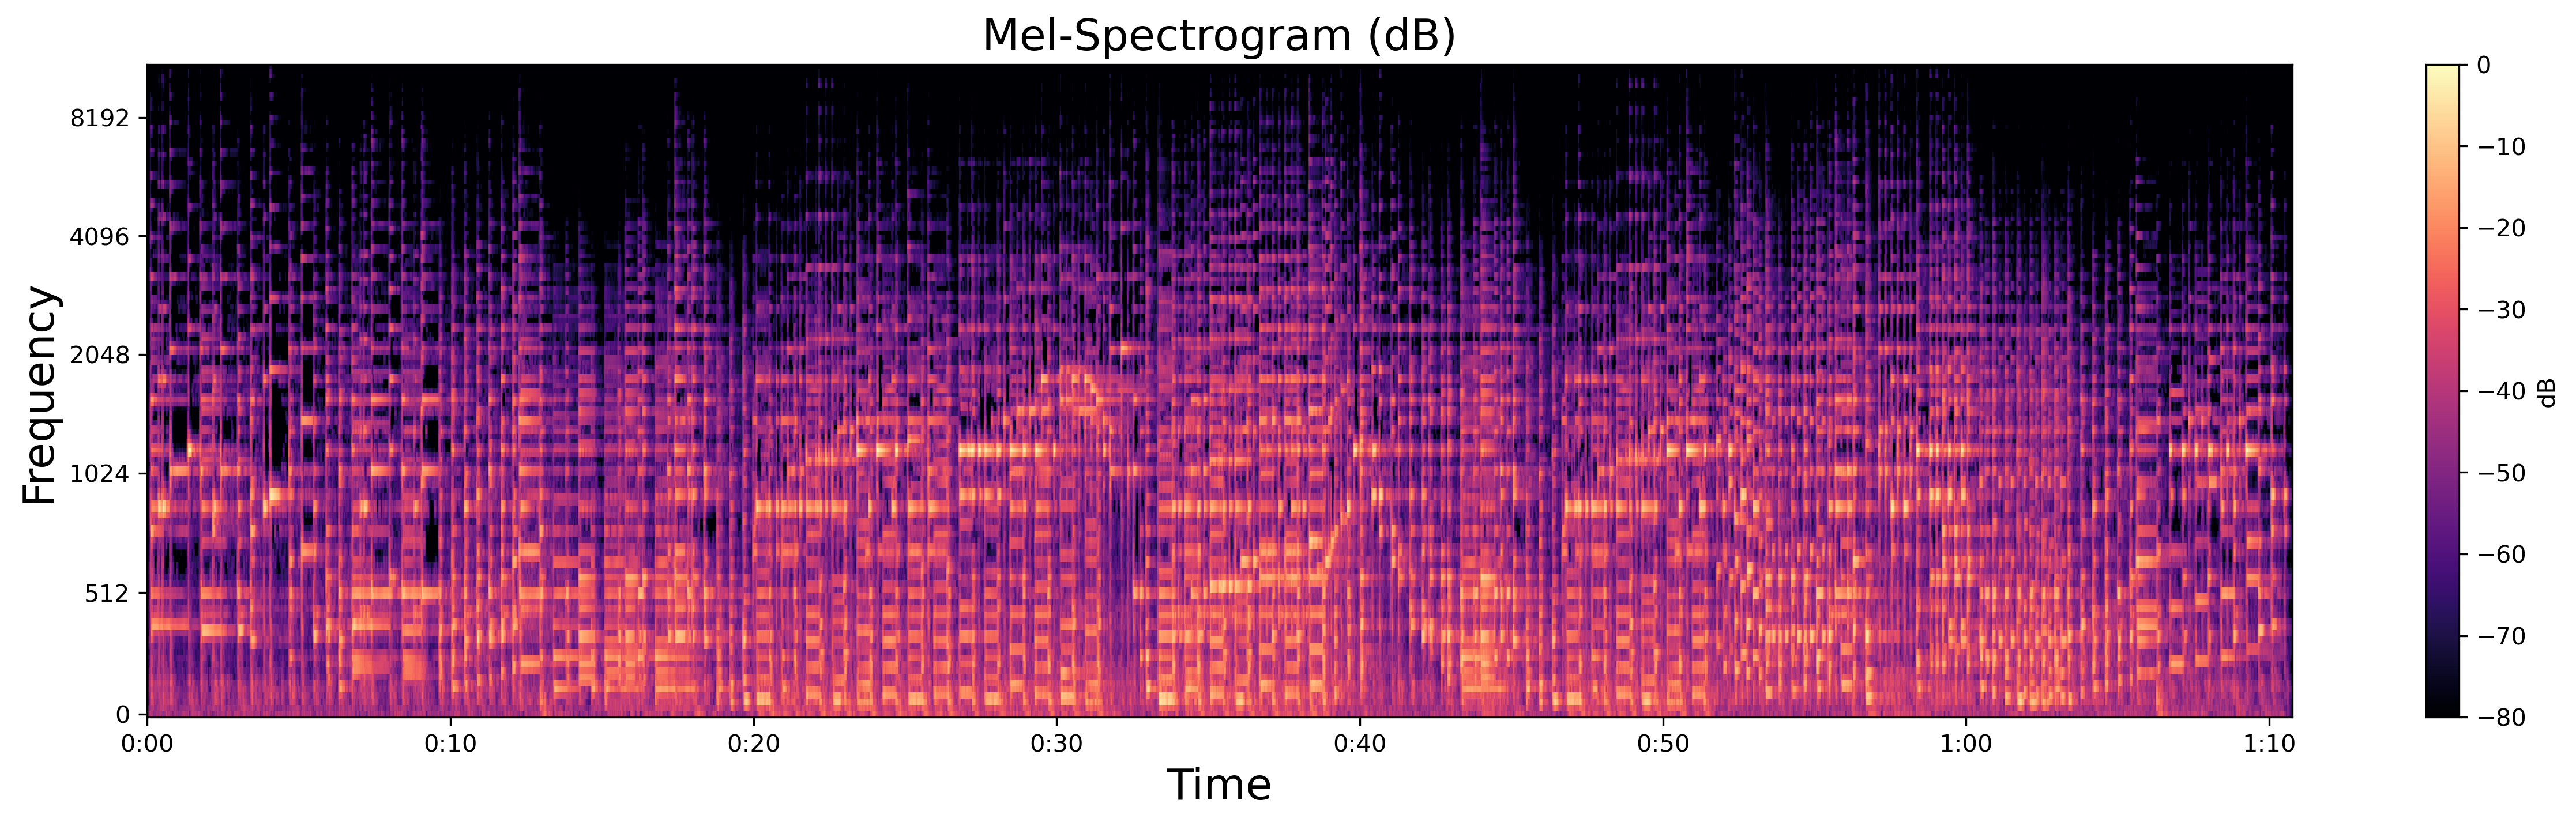

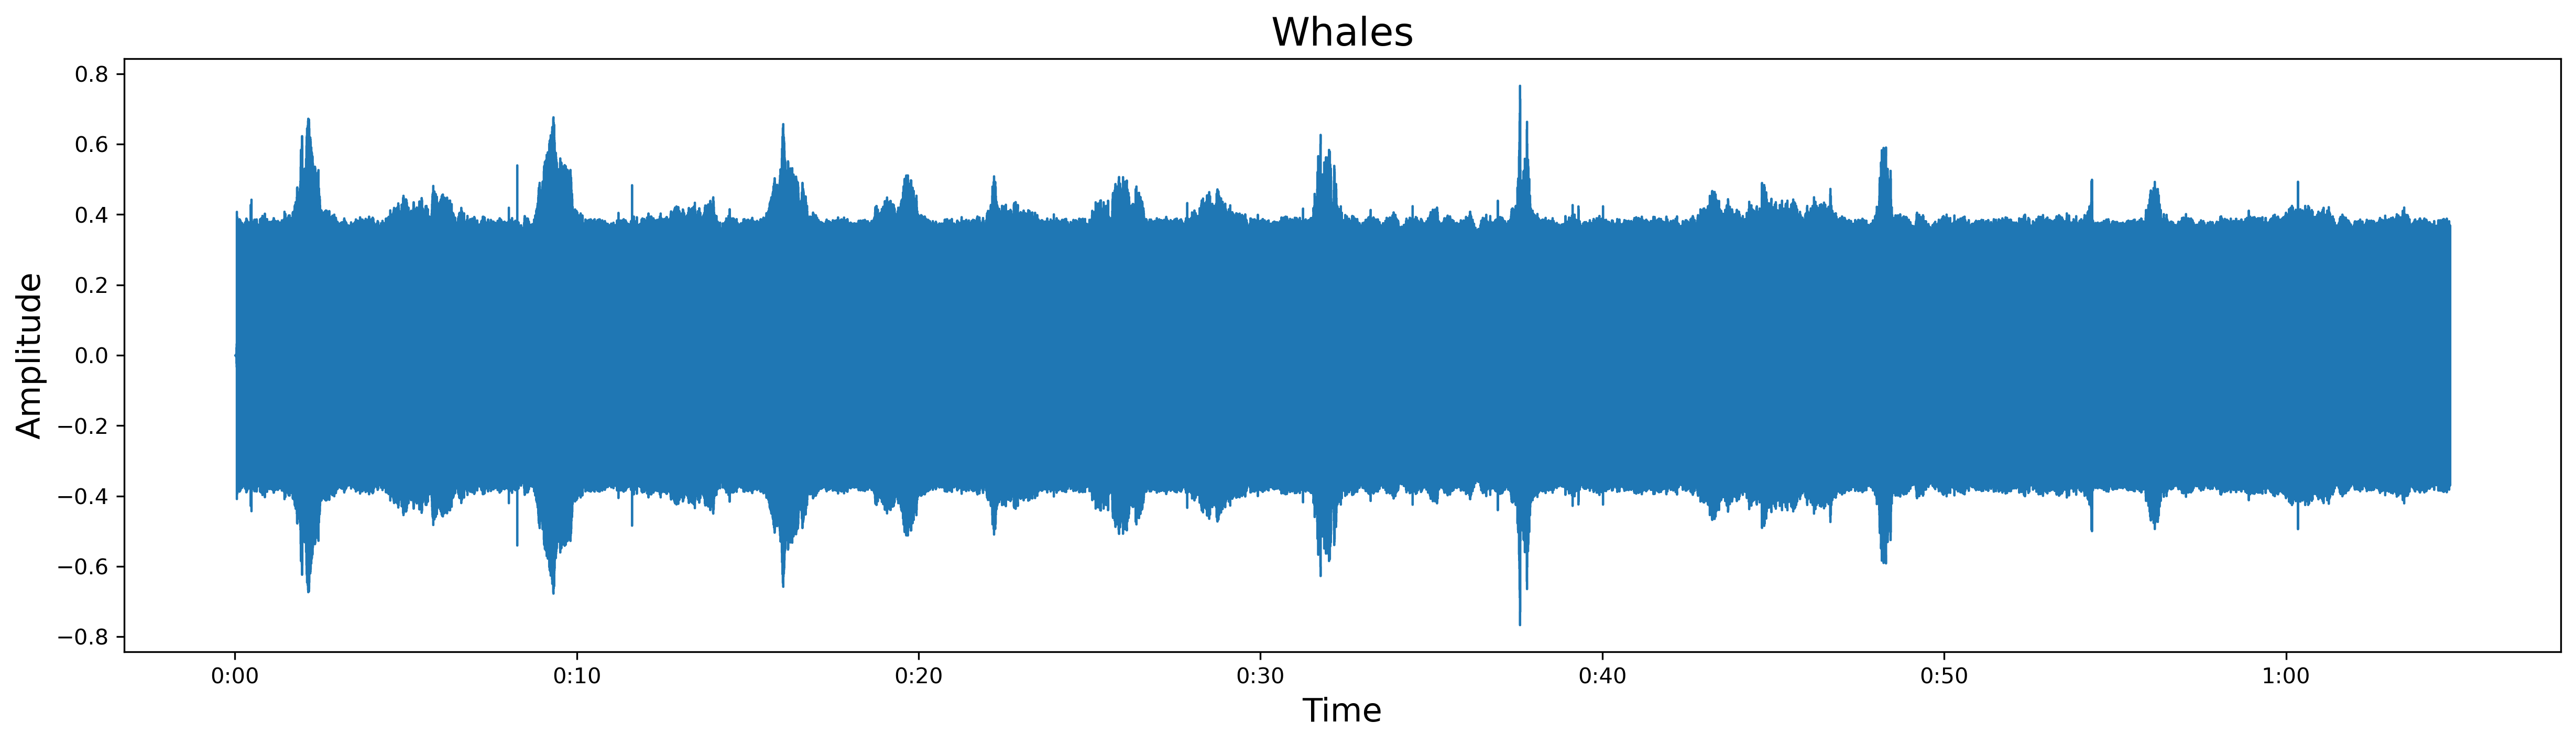

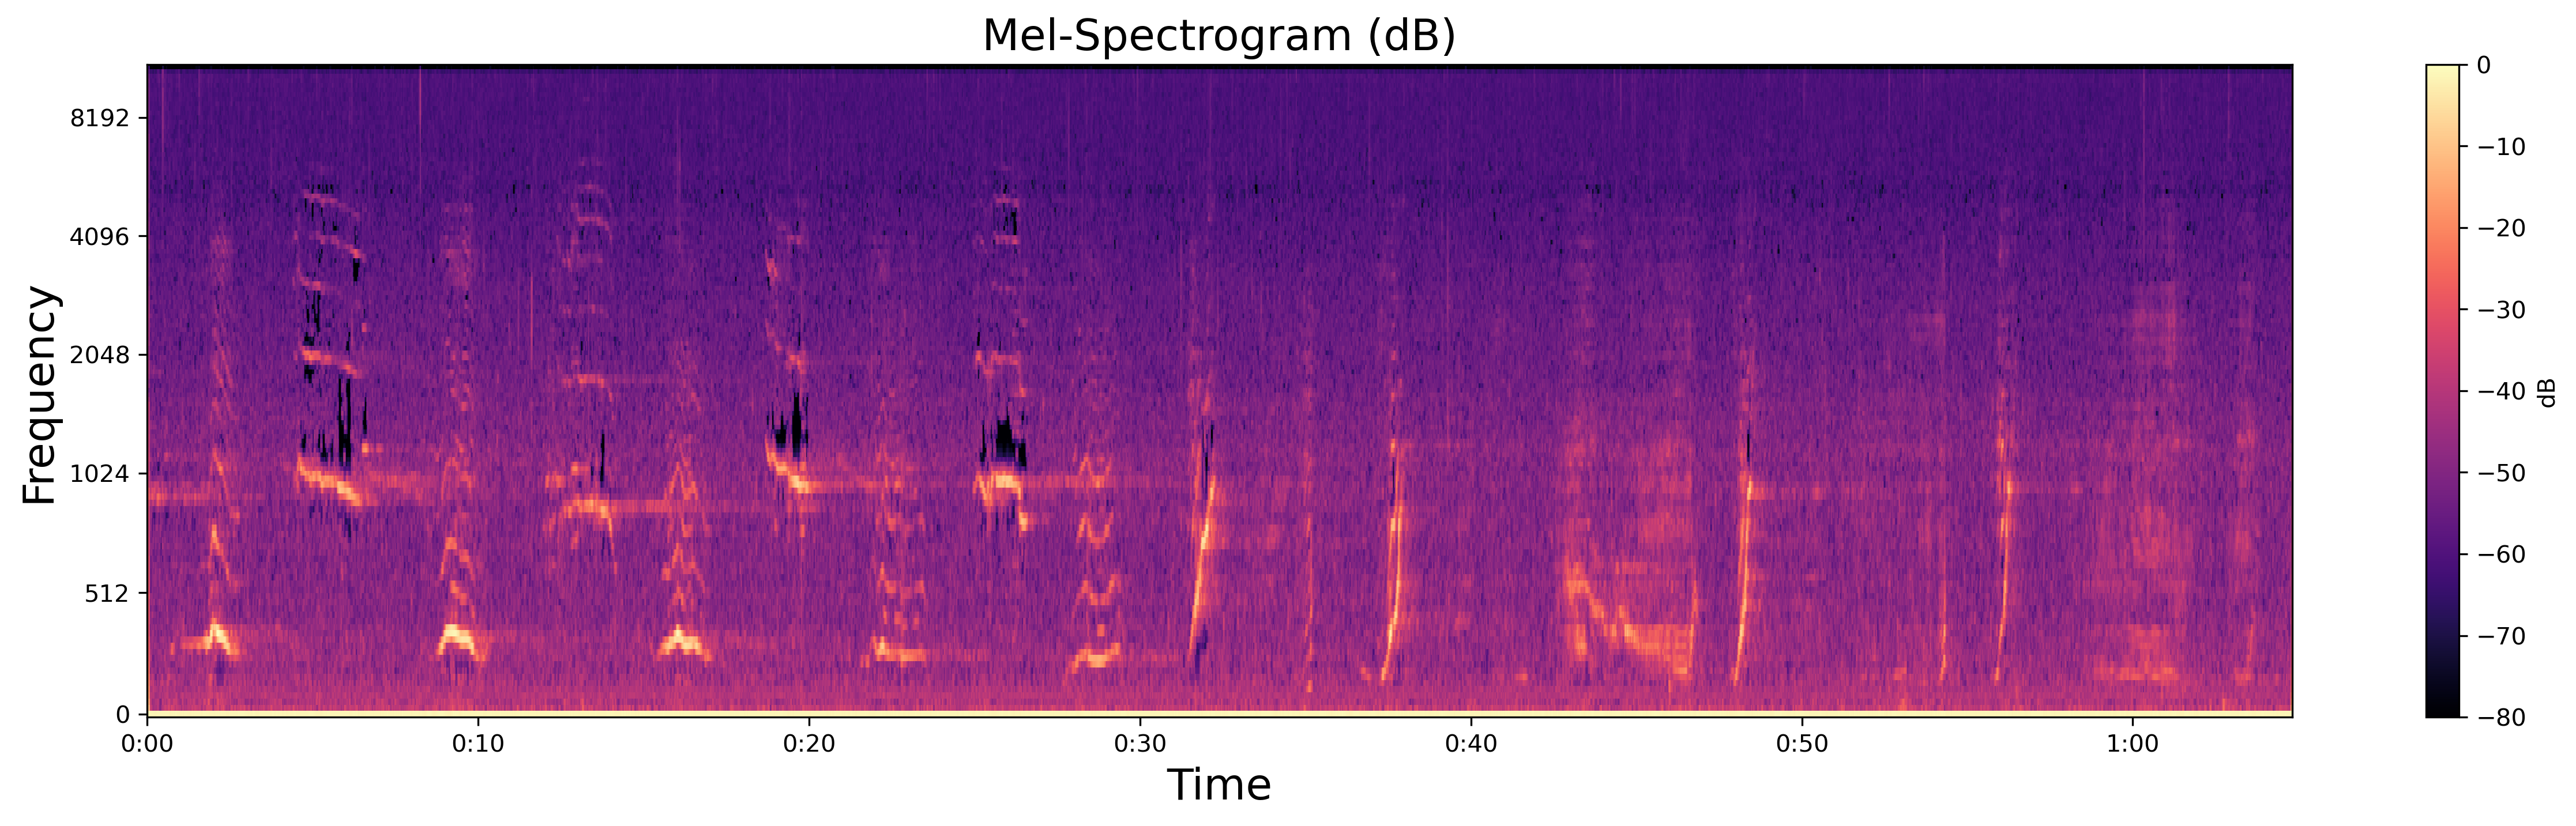

In [17]:
# this is the number of samples in a window per fft
n_fft = 2048
# The amount of samples we are shifting after each fft
hop_length = 512

signal, sr = librosa.load(librosa.util.example('trumpet'))
plotdata('Trumpet')

signal, sr = librosa.load(librosa.util.example('pistachio'))
plotdata('Piano')

signal, sr = librosa.load(librosa.util.example('humpback'))
plotdata('Whales')